In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def Bisection(F,a,b,p):
    tol=0.5*10**(-p)
    maxitr=100
    if F(a)*F(b)>0:
        print("Error doesnot lie root between two points")
        return None
    if abs(F(a))<tol:
        return round(a,p)
    if abs(F(b))<tol:
        return round(b,p)
    for _ in range(maxitr):
        c=(a+b)/2
        if abs(F(c))<tol:
            return round(c,p)
        if F(a)*F(c)<0:
            b=c
        else:
            a=c
    else:
        print("Not convergent")
        

In [19]:
def PlotFx(F,a,b,xp):
    x=np.linspace(-8,8,200)
    y=F(x)
    plt.plot(x,y)
    plt.scatter(xp,0,color='red')
    plt.axhline(0,color='green',linestyle='--',linewidth=1)
    plt.show()
    

root: 2.7984


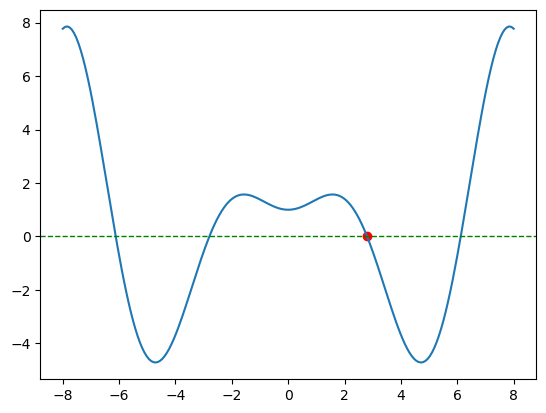

In [20]:
f1=lambda x:x*np.sin(x)+np.cos(x)
root = Bisection(f1,2,3,4)
print("root:",root)
PlotFx(f1,2,3,root)


In [21]:
def Secant(F,a,b,p):
    tol=0.5*10**(-p)
    maxitr=100
    if abs(F(a))<tol:
        return round(a,p)
    if abs(F(b))<tol:
        return round(b,p)
    for _ in range(maxitr):
        if abs(F(b)-F(a))<tol:
            print("Divide by zero error")
            return None
        c=(a*F(b)-b*F(a))/(F(b)-F(a))
        if abs(F(c))<tol:
            return round(c,p)
        a,b=b,c
    else:
        print("Not convergent")

root: 2.7984


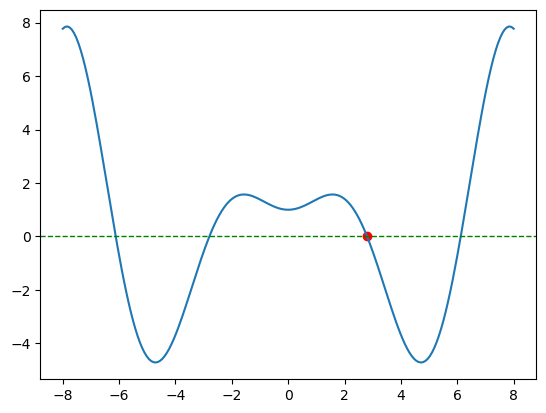

In [22]:
f2=lambda x:x*np.sin(x)+np.cos(x)
root = Secant(f1,2,3,4)
print("root:",root)
PlotFx(f1,2,3,root)

In [23]:
def NewtonRaphson(F,G,x0,p):
    tol=0.5*10**(-p)
    maxitr=100
    if abs(F(x0))<tol:
        return round(x0,p)
    for _ in range(maxitr):
        if abs(G(x0)) < 0.5e-9:
            print("Division by zero error")
            return None
        x1=x0-F(x0)/G(x0)
        if abs(x1-x0)<tol:
            return round(x1,p)
        x0=x1
        
    else:
        print("Error couldnot converge to a particular solution")
        return None
   

In [24]:
f2=lambda x:x*np.sin(x)+np.cos(x)
f3=lambda x:x*np.cos(x)
NewtonRaphson(f2,f3,2,4)

2.7984

In [38]:
def NewtonRaphson2(F,J,X,p=4):
    tol=0.5*10**(-p)
    X0=np.array(X,dtype=float)
    maxitr=100
    for i in range(maxitr):
        if abs(np.linalg.det(J(X0)))<5e-9:
            print("Singular matrix")
            return None
        H=np.linalg.solve(J(X0),-F(X0))
        X1=X0+H
        err= max(abs(H))
        X0=X1.copy()
        if err<tol:
            return np.round(X1,p)
    else:
        print("Not convergent")
        

In [41]:
def f11(x):
    return np.array([
        x[0]**2-x[1]**2-5,
        x[0]**2+x[1]**2-25
        ])
def j11(x):
    return np.array([
        [2*x[0],-2*x[1]],
        [2*x[0],2*x[1]]
        ])
X3=NewtonRaphson2(f11,j11,[2,3])
print(X3)

[3.873  3.1623]
